<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Basic_Classification_01(dataset_to_DataFrame%2C_Imbalanced_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [2]:
(train_set, test_set), info = tfds.load('german_credit_numeric',
                                        split=["train[0%:80%]", "train[80%:]"],
                                        as_supervised=True,
                                        with_info=True)
train_set

<PrefetchDataset element_spec=(TensorSpec(shape=(24,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [3]:
len(list(train_set)), len(list(test_set))

(800, 200)

In [4]:
de_credit, info = tfds.load('german_credit_numeric',
                            split='train',
                            as_supervised=True,
                            with_info=True)
de_credit_df = tfds.as_dataframe(de_credit, info)

de_credit_df.head()

,features,label
0,"[3, 6, 4, 13, 2, 5, 1, 4, 3, 28, 3, 2, 2, 2, 1...",1
1,"[4, 4, 2, 6, 1, 2, 2, 3, 1, 23, 3, 1, 2, 1, 1,...",1
2,"[4, 24, 4, 20, 1, 3, 2, 4, 3, 37, 3, 1, 1, 2, ...",1
3,"[4, 18, 2, 11, 5, 2, 2, 2, 1, 21, 3, 1, 1, 2, ...",1
4,"[4, 6, 2, 13, 3, 3, 1, 4, 1, 62, 3, 1, 1, 1, 1...",1


In [5]:
X_df = de_credit_df['features'].apply(pd.Series)
X_df.columns = [f'f_{i}' for i in range(X_df.shape[1])]
Y=y_df = de_credit_df['label']
# df = pd.concat([df, de_credit_df['label']], axis=1)

In [6]:
X_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23
0,3,6,4,13,2,5,1,4,3,28,...,1,1,0,1,0,0,1,0,0,1
1,4,4,2,6,1,2,2,3,1,23,...,1,0,0,1,0,1,0,0,1,0
2,4,24,4,20,1,3,2,4,3,37,...,1,1,0,1,0,0,1,0,0,1
3,4,18,2,11,5,2,2,2,1,21,...,1,0,0,1,0,1,0,0,0,1
4,4,6,2,13,3,3,1,4,1,62,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,2,12,2,5,3,2,2,43,...,1,1,0,1,0,0,1,0,0,1
996,4,36,4,35,1,4,3,4,3,37,...,1,1,0,1,0,0,1,0,0,1
997,4,24,4,26,1,5,4,3,1,46,...,1,0,0,0,1,0,1,0,0,1
998,1,8,4,7,1,5,3,4,1,47,...,1,1,0,1,0,0,1,0,1,0


(array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

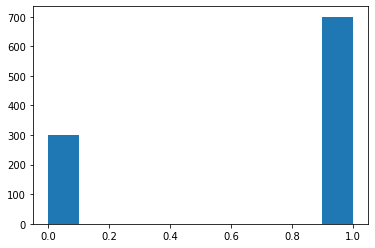

In [7]:
import matplotlib.pyplot as plt
plt.hist(y_df)

(array([700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

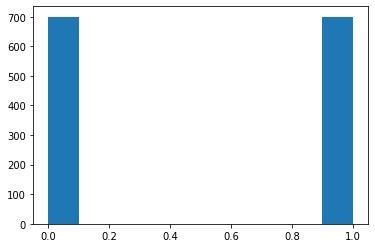

In [8]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_df, y_df)
plt.hist(y_balanced)

In [9]:
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)
df_balanced

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,label
0,3,6,4,13,2,5,1,4,3,28,...,1,0,1,0,0,1,0,0,1,1
1,4,4,2,6,1,2,2,3,1,23,...,0,0,1,0,1,0,0,1,0,1
2,4,24,4,20,1,3,2,4,3,37,...,1,0,1,0,0,1,0,0,1,1
3,4,18,2,11,5,2,2,2,1,21,...,0,0,1,0,1,0,0,0,1,1
4,4,6,2,13,3,3,1,4,1,62,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,18,2,20,1,3,2,4,1,20,...,0,0,1,0,1,0,0,0,1,0
1396,2,12,2,15,1,2,4,1,1,23,...,0,0,1,0,1,0,0,0,1,0
1397,2,30,4,84,1,4,3,2,2,49,...,0,0,1,0,0,1,0,0,1,0
1398,1,14,2,90,1,5,1,4,2,45,...,1,0,1,0,0,1,0,0,0,0


In [10]:
train = df_balanced.sample(frac=0.8) #random state is a seed value
test = df_balanced.drop(train.index)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [11]:
X_train

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23
533,1,24,3,17,1,2,2,2,3,29,...,1,0,0,1,0,1,0,0,1,0
430,1,24,2,20,1,3,3,4,1,21,...,1,0,0,1,0,1,0,0,1,0
417,1,6,4,7,4,4,2,4,1,39,...,1,1,0,1,0,0,1,0,1,0
1307,4,9,2,20,1,2,2,2,3,19,...,1,0,0,0,1,1,0,0,0,1
824,4,36,4,57,4,5,3,2,3,38,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,18,4,11,1,5,3,3,1,30,...,1,1,0,0,0,0,1,0,0,1
593,2,12,2,10,4,2,2,4,1,19,...,1,0,0,1,0,1,0,0,1,0
1314,4,36,4,79,1,3,2,2,1,25,...,1,1,0,1,0,0,1,0,0,1
1235,1,18,2,12,1,3,4,3,1,47,...,1,0,0,1,0,0,1,0,1,0


In [12]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.dtype

dtype('float64')

In [15]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(24,), dtype='float64'),                           
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')                             
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19,841
Trainable params: 19,841
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])

Epoch 1/50
35/35 [==============================] - 1s 17ms/step - loss: 1.6430 - accuracy: 0.5848 - val_loss: 1.3433 - val_accuracy: 0.6357 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 1.1396 - accuracy: 0.7009 - val_loss: 0.9836 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.8675 - accuracy: 0.7170 - val_loss: 0.7914 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.7304 - accuracy: 0.7277 - val_loss: 0.7147 - val_accuracy: 0.6893 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6593 - accuracy: 0.7366 - val_loss: 0.6465 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6109 - accuracy: 0.7473 - val_loss: 0.6182 - val_accuracy: 0.7321 - lr: 0.0010
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5878 - 

In [17]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7571


[0.5268749594688416, 0.7571428418159485]

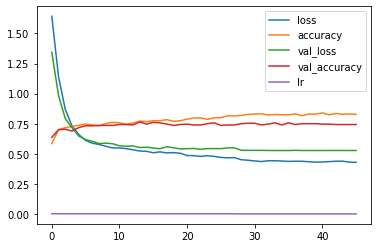

In [18]:
pd.DataFrame(history.history).plot()